4

In [60]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2024-12-19 14:15:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.207, 108.177.11.207, 108.177.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   133MB/s    in 0.5s    

2024-12-19 14:15:54 (133 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [62]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [63]:
rootPath = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(rootPath, 'train')
validation_dir = os.path.join(rootPath, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [64]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.819.jpg', 'cat.274.jpg', 'cat.485.jpg', 'cat.788.jpg', 'cat.359.jpg', 'cat.116.jpg', 'cat.547.jpg', 'cat.893.jpg', 'cat.90.jpg', 'cat.3.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [66]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [67]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

rootPath = '/tmp/cats_and_dogs_filtered'

imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train'),
    target_size=(64, 64),
    subset='training'
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'validation'),
    target_size=(64, 64),
    subset='validation'
)

Found 1800 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()

model.add(layers.InputLayer(input_shape=(64, 64, 3)))
model.add(layers.Conv2D(16, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(32, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(64, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,253,090 (8.59 MB)

 Trainable params: 2,253,090 (8.59 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['acc'],
)

In [72]:
epochs = 32
history = model.fit(
    trainGen,
    epochs=epochs,
    steps_per_epoch=int(trainGen.samples / epochs),  # Convert to integer
    validation_data=validationGen,
    validation_steps=int(trainGen.samples / epochs),  # Convert to integer
)

Epoch 1/32


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 336ms/step - acc: 0.4813 - loss: 0.6963 - val_acc: 0.6600 - val_loss: 0.6929
Epoch 2/32
 1/56 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - acc: 0.6562 - loss: 0.6925

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.6562 - loss: 0.6925 - val_acc: 0.5800 - val_loss: 0.6930
Epoch 3/32
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 287ms/step - acc: 0.5145 - loss: 0.6925 - val_acc: 0.6100 - val_loss: 0.6902
Epoch 4/32
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.6250 - loss: 0.6896 - val_acc: 0.5500 - val_loss: 0.6908
Epoch 5/32
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 289ms/step - acc: 0.5434 - loss: 0.6922 - val_acc: 0.5900 - val_loss: 0.6785
Epoch 6/32
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.5312 - loss: 0.6790 - val_acc: 0.5800 - val_loss: 0.6773
Epoch 7/32
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 269ms/step - acc: 0.5429 - loss: 0.6843 - val_acc: 0.5900 - val_loss: 0.6722
Epoch 8/32
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.5000 - loss: 0.6929 - val_acc: 0.6000 - val_loss: 0.6724
Epoch 9/32
56/56 ━━━━━━━━━━━━━━━━━━━━ 16s 268ms/step - acc: 0.5924 - loss: 0.6813 - val_acc: 0.6200 - val_loss: 0.6545
Epoch 10/32
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.5000 - los

In [74]:
print("-- Evaluate --")
scores = model.evaluate(validationGen, steps=5)  # Use model.evaluate instead
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - acc: 0.7389 - loss: 0.5446
compile_metrics: 73.00%


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [76]:
model.evaluate(validationGen)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - acc: 0.7318 - loss: 0.5468


[0.5585505962371826, 0.7200000286102295]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
예측: 고양이
정답: 개


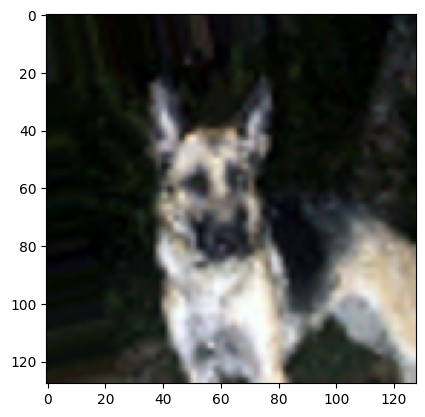

In [80]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['고양이', '개']

# Use next(validationGen) instead of validationGen.next()
imgs = next(validationGen)
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)

# Replace predict_classes with predict for newer TensorFlow versions
result = model.predict(arr.reshape(1, 64, 64, 3))
# Get the class index with the highest probability
result = np.argmax(result, axis=1)
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))